# Spatial Point Pattern
<img src="images/g2084.png" />

Spatial point pattern analysis is the evaluation of the pattern, or distribution, of a set of points in geographical space. Objective of point pattern analysis.The idea is to find and explain structures in our data

A point pattern dataset gives the locations of an objects/observation occurring in a particular study region.

Objective of point pattern analysis can be for example,

- Are event locations random?
- If not are there underlying processes which generated the pattern?
- Do different types of points have a relationship to each other?
- Can we develop a model that explains the patterns in our data?

**Points and Event Points**

To start we consider a series of point locations, $(s_1,s_2,…,s_n)$ in a study region R. We limit our focus here to a two-dimensional space so that $s_j=(x_j,y_j)$ is the spatial coordinate pair for point location $j$

<img src="images/ppp_example.png" width=200 />

We will be interested in two different types of points.

**Event Points**

Event Points are locations where something of interest has occurred. The term event is very general here and could be used to represent a wide variety of phenomena. Some examples include:

- locations of individual plants of a certain species
- archeological sites
- addresses of disease cases
- locations of crimes
- the distribution of neurons
- ...


It is important to recognize that in the statistical analysis of point patterns the interest extends beyond the observed point pattern at hand. The observed patterns are viewed as realizations from some underlying spatial stochastic process.

**Arbitrary Points**

The second type of point we consider are those locations where the phenomena of interest has not been observed. These go by various names such as "empty space" or "regular" points, and at first glance might seem less interesting to a spatial analayst. However, these types of points play a central role in a class of point pattern methods that we explore below.

**Random point pattern**

independent from space ...

- noise
- individuality
- non-spatial process

**Structured point patterns**

are influenced by:

- space (first-order effects/properties)
- points (second-order effects/properties)



 **Exploring first-order properties**

Estimate how intensity of point pattern varies over an area (Quadrat analysis, kernel estimation).First-order properties relate to intensity and spatial density over a study region, defined as the mean number of eventsper unit area. Neither the intensity nor the density provide any information about the interaction between points. Analysis of first-order properties commonly involves the use of intensity estimators, for example kernel density estimation. 

<img src="images/firstorder.png" width=200 />

**Exploring second-order properties**

Estimate the presence of spatial dependence among events (Nearest neighbor distances, K-function).Second-order properties relate to the strength and type of interactions between events of the point process, and involvea relationship between numbers of events in pairs of areas.  As defined by (Bivand et al., 2008, p. 171) “the second-order intensity of two pointsxandyreflects the probability of any pair of events occurring in the vicinities ofxandy, respectively." 

<img src="images/secondorder.png" width=200 />

Events are independent

Complete spatial randomness (CSR) describes a process whereby events occur within a given study area (R) completely at random. It is synonymous with a homogeneous Poisson process.

Assumptions:

- CSR assumes that points follow a homogeneous Poisson process over the study area
- the density of points is constant (homogeneous) over the study area
- For a random sample of subregions, the frequency distribution of the number of points in each region will follow a Poisson distribution



Events are not independent

- the Cox process is an inhomogeneous Poisson process with a random intensity function. (Approach: create random pattern, create points using Poisson and covariate of random intensity)
- a Gibbs process involves influence from other points and models an explicit interaction between points (mainly for inhibition). In the case of a hard core Gibbs process, points avoid each other up to a certain threshold and they ignore each other.
- a Strauss process has a constant influence within a certain distance threshold.
- a Neyman–Scott process is used to create clustered point pattern by creating random cluster centres that create "offspring" points


## Pysal package

Methods of Point Pattern Analysis in PySAL

The points module in PySAL implements basic methods of point pattern analysis organized into the following groups:

- Point Processing
- Centrography and Visualization
- Quadrat Based Methods
- Distance Based Methods


In [2]:
import libpysal as ps
import numpy as np
from pointpats import PointPattern
import pandas as pd
import contextily
import geopandas as gpd
from shapely.geometry import Point

Let's create our own point pattern. Therefor we can for example use a list of coordinates

In [ ]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21],
          [9.47, 31.02],  [30.78, 60.10], [75.21, 58.93],
          [79.26,  7.68], [8.23, 39.93],  [98.73, 77.17],
          [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
p1 = PointPattern(points)
p1

In [ ]:
p1.mbb

In [ ]:
p1.summary()

In [ ]:
type(p1.points)

In [ ]:
np.asarray(p1.points)

Of course we can create point pattern also from numpy array

In [ ]:
np.asarray(p1.points)

In [ ]:
p1_np = PointPattern(points)
p1_np.summary()

### Real Data

In the following example we will use the FIRMS Active Fire Data derived from the Visible Infrared Imaging Radiometer Suite (VIIRS). For more infromation go to https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/active-fire-data

In [3]:
fires = pd.read_csv('Data/non-spatial/fire/nigeria_fires.csv')
geometry = [Point(xy) for xy in zip(fires.LONGITUDE,fires.LATITUDE)]
crs = {'init': 'epsg:2263'}
gdf = gpd.GeoDataFrame(fires, crs=crs, geometry=geometry)
gdf_fires = gdf.copy()
gdf_fires

/home/wascal/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,LONGITUDE,LATITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,DAYNIGHT,geometry
0,6.70470,5.66217,307.7,0.52,0.42,2020-06-13,118,N,VIIRS,n,1.0NRT,286.2,1.5,N,POINT (6.70470 5.66217)
1,5.05021,5.95086,317.8,0.43,0.38,2020-06-13,118,N,VIIRS,n,1.0NRT,286.6,1.6,N,POINT (5.05021 5.95086)
2,6.70694,5.65936,307.6,0.52,0.42,2020-06-13,118,N,VIIRS,n,1.0NRT,285.8,0.6,N,POINT (6.70694 5.65936)
3,6.70757,5.66319,301.8,0.52,0.42,2020-06-13,118,N,VIIRS,n,1.0NRT,286.2,0.6,N,POINT (6.70757 5.66319)
4,6.51535,5.65914,335.0,0.51,0.41,2020-06-13,118,N,VIIRS,n,1.0NRT,287.7,4.1,N,POINT (6.51535 5.65914)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,8.46747,11.90061,339.2,0.39,0.44,2020-06-13,1218,N,VIIRS,n,1.0NRT,299.6,1.7,D,POINT (8.46747 11.90061)
1493,6.62853,5.77125,312.6,0.52,0.41,2020-06-13,118,N,VIIRS,n,1.0NRT,285.5,1.2,N,POINT (6.62853 5.77125)
1494,6.21886,5.88191,308.8,0.49,0.40,2020-06-13,118,N,VIIRS,n,1.0NRT,285.0,1.6,N,POINT (6.21886 5.88191)
1495,6.48432,5.71457,320.9,0.51,0.41,2020-06-13,118,N,VIIRS,n,1.0NRT,285.8,2.7,N,POINT (6.48432 5.71457)


In [4]:
import mplleaflet
ax = gdf_fires.plot()
mplleaflet.display(fig=ax.figure, tiles='cartodb_positron')

/usr/lib/python3/dist-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [5]:
pp= PointPattern(gdf[['LONGITUDE','LATITUDE']])
pp.df

,x,y
0,6.70470,5.66217
1,5.05021,5.95086
2,6.70694,5.65936
3,6.70757,5.66319
4,6.51535,5.65914
...,...,...
1492,8.46747,11.90061
1493,6.62853,5.77125
1494,6.21886,5.88191
1495,6.48432,5.71457


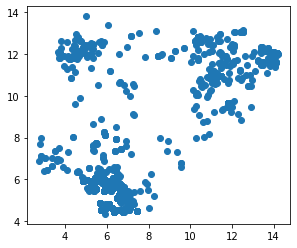

In [6]:
gdf_fires.plot()

### Attributes

In [ ]:
pp.summary()

In [ ]:
pp.points

In [ ]:
pp.head()

In [ ]:
pp.tail()

In [ ]:
pp.plot(window=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.jointplot(x="LONGITUDE", y="LATITUDE", data=pp.df);

###  Window

In order to define the real extent of our point pattern, we can also add a so called window, this window can be

- a rectangle;
- a polygon or polygons, with polygonal holes

In [7]:
from pointpats import Window
import geopandas as gpd

win = gpd.read_file('Data/vector/fire/nigeria.shp')
win.geometry

0    POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2....
Name: geometry, dtype: geometry

In [8]:
x,y = win.geometry[0].exterior.coords.xy
window = Window(list(zip(x,y)))

In [9]:
pp= PointPattern(gdf, window=window)

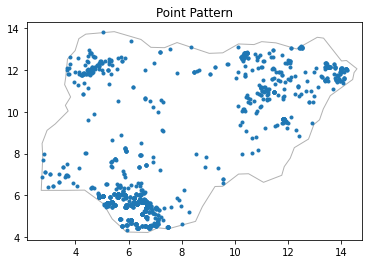

In [10]:
pp.plot(window=True)

### Marks

Such point pattern datasets can contain solely locations of events in space (unmarked point pattern) or comprise information of their properties (marked point pattern). These marks can be for example categorical (e.g. tree species), continuous (e.g. tree diameter) or even more complex.

Unmarked point pattern can be modified to be a marked point pattern using the method add_marks while the method explode could decompose a marked point pattern into a sequence of unmarked point patterns. Both methods belong to the class PointPattern.

In [ ]:
dn = gdf.DAYNIGHT
dn[dn == 'D'] = 1
dn[dn == 'N'] = 2
dn

In [ ]:
pp.add_marks([dn], mark_names=['DN'])
pp.summary()

In [ ]:
pp_dn = pp.explode('DN')

In [ ]:
for ppn in pp_dn:
    ppn.plot()


### Point Processes

As defined by Diggle (2006) Spatial Point Processes are stochastic mechanisms which generate a series of events across a region.  The locations of the events generated by a point process are a point pattern.  Spatial Point Processes are generally static, whereby the statistical parameters of the underlying process do not vary over space (invariant undertranslation), and isotropic, whereby that they exhibit the same value when measured from different directions (invariantunder rotation).

- **Random**: any point in the point pattern is equally likely to occur at any location. The location of any point is not affected by the location of any other point
- **Uniform**: every point inside the observed area is as far away from all of its neighbors as possible
- **Clustered**: points are concentrated close together

<img src="images/pointpattern.png" />

Random point patterns are the outcome of CSR. CSR has two major characteristics:
1. Uniform: each location has equal probability of getting a point (where an event happens)
2. Independent: location of event points are independent

It usually serves as the null hypothesis in testing whether a point pattern is the outcome of a random process.

There are two types of CSR:

- N-conditioned CSR: N is fixed 

    - Given the total number of events N occurring within an area A, the locations of the N events represent an independent random sample of N locations where each location is equally likely to be chosen as an event.

- λ-conditioned CSR: N is randomly generated from a Poisson process.

    - The number of events occurring within a finite region R is a random variable N˙ following a Poisson distribution with mean λ|R|, with |R| denoting area of R and λ denoting the intensity of the point pattern.
    - Given the total number of events N˙occurring within an area R, the locations of the N˙ events represent an independent random sample of N˙locations where each location is equally likely to be chosen as an event.


**Simulating CSR** 

In [15]:
# N-conditioned CSR

from pointpats import PoissonPointProcess

np.random.seed(5)
samples = PoissonPointProcess(pp.window, pp.n, 1, conditioning=False, asPP=False)
samples

In [16]:
samples.realizations[0]

array([[ 5.33019622, 12.83315338],
       [13.04076969, 11.49949703],
       [ 5.14865727, 12.91213268],
       ...,
       [ 5.45677696,  9.04654663],
       [ 7.49977603, 11.70360145],
       [ 8.17170249,  5.89393661]])

In [17]:
# build a point pattern from the simulated point series
pp_csr = PointPattern(samples.realizations[0], window=window)
pp_csr

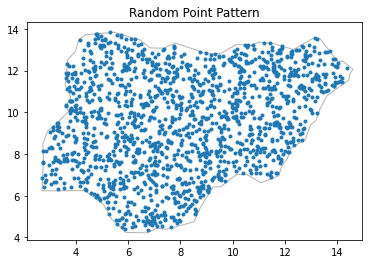

In [18]:
pp_csr.plot(window= True,title='Random Point Pattern')

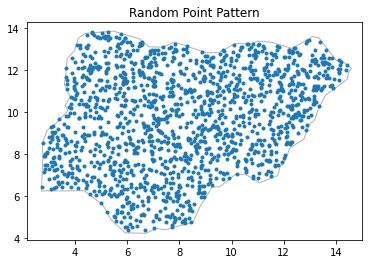

In [19]:
# λ-conditioned CSR 

from pointpats import PoissonPointProcess

np.random.seed(5)
samples = PoissonPointProcess(pp.window, pp.n, 1, conditioning=True, asPP=False)
pp_csr = PointPattern(samples.realizations[0], window=window)
pp_csr.plot(window= True,title='Random Point Pattern')

Clustered Patterns are more grouped than random patterns. Visually, we can observe more points at short distances. There are two sources of clustering:

- Contagion: presence of events at one location affects probability of events at another location (correlated point process)
- Heterogeneity: intensity 𝜆 varies with location (heterogeneous Poisson point process)

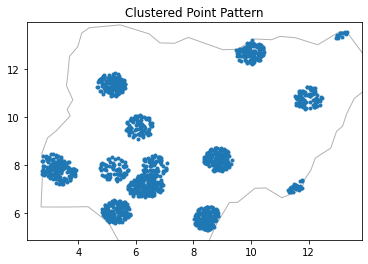

In [24]:
from pointpats import PoissonClusterPointProcess

np.random.seed(5)
csamples = PoissonClusterPointProcess(pp.window, pp.n, 10, 0.5, 1, asPP=True, conditioning=False)
pp_pcp = csamples.realizations[0]
pp_pcp.plot(window=True,  title='Clustered Point Pattern') 

# Analysing Point Pattern

## Centrography

Centrography refers to a set of descriptive statistics that provide summary descriptions of point patterns.

<img src="images/centrography.svg" />
Source: https://mgimond.github.io/Spatial/point-pattern-analysis.html

In the pointpats package you can find several functions for centrography including

**Central Tendency**
- mean_center: calculate the mean center of the unmarked point pattern.
- weighted_mean_center: calculate the weighted mean center of the marked point pattern.
- manhattan_median: calculate the manhattan median
- euclidean_median: calculate the Euclidean median
    
**Dispersion and Orientation**
- std_distance: calculate the standard distance

**Shape Analysis**
- hull: calculate the convex hull of the point pattern
- mbr: calculate the minimum bounding box (rectangle)


In [ ]:
pp.plot()

### Central Tendency

Central tendency is often used when we are concerned about the center of our spatial point pattern. Several approaches can be used to measure central tendencies

In [ ]:
import matplotlib.pyplot as plt
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse

**Mean center**

$$x_{mc}=\frac{1}{n} \sum^n_{i=1}x_i$$
$$y_{mc}=\frac{1}{n} \sum^n_{i=1}y_i$$

In [ ]:
mc = mean_center(pp.points)
mc

In [ ]:
pp.plot()
plt.plot(mc[0], mc[1], 'b^', color='red', label='Mean Center')
plt.legend(numpoints=1)

### Weighted Mean Center $(x_{wmc},y_{wmc})$

$$x_{wmc}=\sum^n_{i=1} \frac{w_i x_i}{\sum^n_{i=1}w_i}$$
$$y_{wmc}=\sum^n_{i=1} \frac{w_i y_i}{\sum^n_{i=1}w_i}$$


Weighted mean center is usefull wehn we are working with marked point pattern.

In [ ]:
pp.df['dn'] = pd.Categorical(pp.df['mark_11'])
pp.df['weights'] = pp.df.dn.cat.codes


In [ ]:
weights = pp.df['weights'].to_numpy()
weights

In [ ]:
wmc = weighted_mean_center(pp.points, weights)
wmc

In [ ]:
pp.plot() #use class method "plot" to visualize point pattern
plt.plot(mc[0], mc[1], 'b^', label='Mean Center') 
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.legend(numpoints=1)

### Weighted Mean Center $(x_{wmc},y_{wmc})$

The Manhattan median is the center location where the absolute distance to all points is minimized.

$$min  f(x_{mm},y_{mm})= \sum^n_{i=1}(|x_i-x_{mm}|+|y_i-y_{mm}|)$$

In [ ]:
pp.n

In [ ]:
mm = manhattan_median(pp.points)
mm

In [ ]:
pp.plot()
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.plot(mm[0], mm[1], 'rv', label='Manhattan Median')
plt.legend(numpoints=1)

### Euclidean Median

The Euclidean Median describes the location from which the sum of the Euclidean distances to all points in a distribution is a minimum.

$$min  f(x_{em},y_{em})= \sum^n_{i=1} \sqrt{(x_i-x_{em})^2+(y_i-y_{em})^2}$$

In [ ]:
em = euclidean_median(pp.points)
em

In [ ]:
pp.plot()
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.plot(mm[0], mm[1], 'rv', label='Manhattan Median')
plt.plot(em[0], em[1], 'm+', label='Euclidean Median')
plt.legend(numpoints=1)

### Standard Distance & Standard Distance Circle
The Standard distance provides a measure of how dispersed the events are around their mean center. 

$$SD = \displaystyle \sqrt{\frac{\sum^n_{i=1}(x_i-x_{m})^2}{n} + \frac{\sum^n_{i=1}(y_i-y_{m})^2}{n}}$$

In [ ]:
stdd = std_distance(pp.points)
stdd

In [ ]:
circle1=plt.Circle((mc[0], mc[1]),stdd,color='r')
ax = pp.plot(get_ax=True, title='Standard Distance Circle')
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
ax.set_aspect('equal')
plt.legend(numpoints=1)

In [ ]:
sx, sy, theta = ellipse(pp.points)
sx, sy, theta

In [ ]:
theta_degree = np.degrees(theta) #need degree of rotation to plot the ellipse
theta_degree

In [ ]:
from matplotlib.patches import Ellipse
from pylab import figure, show,rand
fig = figure()
#ax = fig.add_subplot(111, aspect='equal')
e = Ellipse(xy=mean_center(pp.points), width=sx*2, height=sy*2, angle=-theta_degree) #angle is rotation in degrees (anti-clockwise)
ax = pp.plot(get_ax=True, title='Standard Deviational Ellipse')
ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_facecolor([0.8,0,0])
e.set_edgecolor([1,0,0])

plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.legend(numpoints=1)
show()

## Density based analysis

A point pattern can be thought of as a “realization” of an underlying process whose intensity λ is estimated from the observed point pattern’s density. 

Density based analsis belong to the first order property of a pattern. Therfore it concerns itself with the variation of the observations’ density across a study area. For example, the distribution of oaks will vary across a landscape based on underlying soil characteristics (resulting in areas having dense clusters of oaks and other areas not).

Density measurements can be broken down into two categories: 

- global: simply the ratio of observed number of points to the study region’s surface area 

- local: measures density at different locations within the study area

#### global density

The intensity of a point process at point $si$ can be defined as:

$$\lambda(s_j) = \lim \limits_{|\mathbf{A}s_j| \to 0} \left \{ \frac{E(Y(\mathbf{A}s_j)}{|\mathbf{A}s_j|} \right \}$$

$\mathbf|{A}s_j|$: area of region {A}s_j

$E(Y(\mathbf{A}s_j)$: expected event points in {A}s_j

In PySAL, the intensity is estimated by using a geometric object to encode the study region, also called window. So basically divide the number of our point events by the area of our window. This can be for example the minimum bounding box

In [ ]:
pp.lambda_mbb

or the convex hull of the point pattern

In [ ]:
pp.lambda_mbb

#### Local density

But if we just look at the global density we may loose information on the spatial patterns of the point distribution. Therefor we will also look at the local density.One way to do this is to use the quadrat count.The quadrat density is calculated by dividing the study area into multiple sub-regions. The density is than computed for each quadrat by dividing the number of points in each quadrat by the quadrat’s area.

We can assume that if the underlying process is a CSR process, the expected number of points inside a sub-region of area $|A|$ should be $\lambda |A|$ ($\lambda$ is the intensity which is uniform across the study area for a CSR). If we now overlay multiple subregions over the window area we can easily calculate the expected number of points inside each subregion under the null of CSR and compare the observed point counts against the expected counts. Then we can calculate a 𝜒2 test statistic and see if the nullhypotheses (point pattern is the outcome of a random proces) can be rejected

In [ ]:
import pointpats.quadrat_statistics as qs

Let's impose 6x6 rectangles over our point pattern window.

In [ ]:
pp.plot(window=True)

In [ ]:
q_r = qs.QStatistic(pp,shape= "rectangle",nx = 6, ny = 6)

In [ ]:
q_r.plot()

In [ ]:
q_r.chi2

In [ ]:
q_r.df

In [ ]:
q_r.chi2_pvalue

Let's do the same for our simulated CRS point pattern

In [ ]:
q_r = qs.QStatistic(pp_csr,shape= "rectangle",nx = 6, ny = 6)

In [ ]:
q_r.plot()

In [ ]:
q_r.chi2

In [ ]:
q_r.df

In [ ]:
q_r.chi2_pvalue

#### Kernel density

The kernel density, like the quadrat density, is used to compute the local density at smaller sub-regions of our study site. But unlike the quadrat density, it uses a moving window approach overlap results in a overlap between the subregions. The result is raster in which each cell gets the density value computed for the kernel window centered on that cell.

The most basic kernel would be a rectengular window covering for example 3x3 cells. The window moves of the raster cell by cell and assigns the mean value of all 9 cells to the cell in the center. In this case all cells in the window have equal weights. 

In many cases, weights are assigned to the window in form of a kernel function. For example the gaussian kernel function assigns weights to the window that are inversely proportional to their distances to the kernel window center, which produces a smoother density map.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(1, figsize=(9, 9))
sns.kdeplot(pp.df['x'], pp.df['y'],
                n_levels=50, shade=True,
                alpha=0.55, cmap='viridis_r')


In [ ]:
sns.jointplot(pp.df.x, pp.df.y, kind='kde', color="skyblue")

## Distance based approaches

An alternative to the density based methods are the distance based methods. The idea is to investigate how the points are distributed relative to one another (second-order properties). For example if we want to now of the location of deadwood in a rejuvinating forest will be influencing the location of juvenile trees. If this is the case we would assume a to identify patterns of small clustered trees around the deadwood.

### Mean Nearest Neighbor Distance Statistics

The nearest neighbor(s) for a point $u$ is the point(s) $N(u)$ which meet the condition
$$d_{u,N(u)} \leq d_{u,j} \forall j \in S - u$$

The distance between the nearest neighbor(s) $N(u)$ and the point $u$ is nearest neighbor distance for $u$. After searching for nearest neighbor(s) for all the points and calculating the corresponding distances, we are able to calculate mean nearest neighbor distance by averaging these distances.

It was demonstrated by Clark and Evans(1954) that mean nearest neighbor distance statistics distribution is a normal distribution under null hypothesis (underlying spatial process is CSR). We can utilize the test statistics to determine whether the point pattern is the outcome of CSR. If not, is it the outcome of cluster or regular
spatial process?

Mean nearest neighbor distance statistic

$$\bar{d}_{min}=\frac{1}{n} \sum_{i=1}^n d_{min}(s_i)$$

To compute the average first nearest neighbor distance set k=1

In [25]:
pp.knn()

(array([[ 815],
        [ 481],
        [ 103],
        ...,
        [1355],
        [  96],
        [1329]]),
 array([[0.00150814],
        [0.00024759],
        [0.00050567],
        ...,
        [0.00114232],
        [0.00085165],
        [0.00022091]]))

In [26]:
# two nearest neighbors
pp.knn(4)

(array([[ 815,  875,  876,    3],
        [ 481,  826,  566, 1058],
        [ 103,  876,  815,    0],
        ...,
        [1355,   95,  920,   92],
        [  96, 1277, 1141, 1186],
        [1329, 1283,  197,  467]]),
 array([[0.00150814, 0.00187019, 0.00255977, 0.00304587],
        [0.00024759, 0.00065947, 0.00108046, 0.0012088 ],
        [0.00050567, 0.00108337, 0.00209022, 0.00359356],
        ...,
        [0.00114232, 0.00132189, 0.00168345, 0.0018071 ],
        [0.00085165, 0.00159477, 0.00168467, 0.00186625],
        [0.00022091, 0.0004005 , 0.0004998 , 0.00077421]]))

In [27]:
pp.max_nnd

1.0068979940887766

In [28]:
pp.min_nnd

5.385164807095565e-05

In [29]:
pp.mean_nnd

0.03282276773284262

In [30]:
pp.nnd

array([[0.00150814],
       [0.00024759],
       [0.00050567],
       ...,
       [0.00114232],
       [0.00085165],
       [0.00022091]])

In [35]:
# r < 1 = more clustered
# r > 1 = more evenly spaced

r= pp.mean_nnd / pp_csr.mean_nnd

## Nearest Neighbor Distance Functions

Nearest neighbour distance distribution functions of a point process are cumulative distribution functions. By comparing the distance function of the observed point pattern with that of the point pattern from a CSR process, we are able to infer whether the underlying spatial process of the observed point pattern is CSR or not for a given confidence level.

<img src="images/distbased.png" width=500 />

### G function - event-to-event

The first function, Ripley's G function, focuses on the distribution of nearest neighbor distances. That is, the G function summarises the distances between each point in the point pattern to their nearest neighbor in the pattern.

The idea is that "clusterd" point pattern should have more closer points than a "dispersed" pattern while a completely random pattern should have something in between. So if the G function increases rapidly with distance, we probably have a clustered pattern and vice versa.



Let's compute the G function for our point pattern and plot the results.

In [ ]:
from pointpats import  K,L,G,F, Genv, Fenv, Jenv, Kenv, Lenv

gp1 = G(pp, intervals=20)
gp1.plot()

In order to determine if our calculated G-function for our point pattern derivates significantly from a random ditribution, we calculate the simulation envelope. Therefor we simulate CSR a lot of times, say 1000 times. Then, we can calculate the function for each simulated point pattern. For every distance d, we sort the function values of the 1000 simulated point patterns. Given a confidence level, say 95%, we can acquire the 25th and 975th value for every distance d 

In [ ]:
realizations = PoissonPointProcess(pp.window, pp.n, 100, asPP=True) # simulate CSR 100 times
genv = Genv(pp, intervals=20, realizations=realizations)

In [ ]:
coordinates=pp.df[['x','y']].values

In [ ]:
f,ax = plt.subplots(1,2,figsize=(13,5), 
                    gridspec_kw=dict(width_ratios=(6,3)))

ax[0].fill_between(genv.d, genv.low, genv.high, alpha=.5, 
                 label='95% of simulations')

ax[0].plot(genv.d, genv.mean, color='cyan', 
         label='mean of simulations')

ax[0].plot(*genv.observed.T,
         label = 'observed', color='red')

ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].legend()
ax[0].set_title(r"Ripley's $G(d)$ function")
ax[1].scatter(*coordinates.T)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

### F-function - "point-event"

Another way to measure dispersion is to examine the gaps in the pattern usinf the F-Function.  The F-function works by analyzing the distance to points in the pattern from locations in empty space. If the our pattern has large gaps or empty areas, the F function will increase slowly. But, if the pattern is highly dispersed, then the F function will increase rapidly.

In [ ]:
fp1 = F(pp, intervals=20)
fp1.plot()

In [ ]:
fp1.plot(qq=True)

In [ ]:
fenv = Fenv(pp, intervals=40, realizations=realizations)

In [ ]:
f,ax = plt.subplots(1,2,figsize=(9,3), 
                    gridspec_kw=dict(width_ratios=(6,3)))

# plot the middle 95% 
ax[0].fill_between(fenv.d, fenv.low, fenv.high, alpha=.5, 
                 label='95% of simulations')

# show the average of simulations
ax[0].plot(fenv.d, fenv.mean, color='cyan', 
         label='mean of simulations')

# and the observed pattern's G function
ax[0].plot(*fenv.observed.T,
         label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].set_title(r"Ripley's $F(d)$ function")
ax[0].legend()

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

# Interevent distance functions

Nearest neighbor distance functions consider only the nearest neighbor distances. The problem with this approach is, that distances to higher order neigbours a ignored. Interevent distance functions, including K and L functions, are proposed to consider distances between all pairs of event points.

K-,L- and pair correlation function allow us to investigate changes in the surrounding structure of a point with increasing distance from its position. The K function, is used to measure counts, rather than distances. The K function measures the count of points in the pattern within a circle of increasing radius. Patterns with clustering will exhibit a steep rise, whereas patterns with dispersion will exhibit a much slower rise. As before, we can compute a "reference" using simulations based on a completely spatially random process.

In [ ]:
kp1 = K(pp)
kp1.plot()

In [ ]:
kenv = Kenv(pp, intervals=40, realizations=realizations)

In [ ]:
f,ax = plt.subplots(1,2,figsize=(9,3), 
                    gridspec_kw=dict(width_ratios=(6,3)))
ax[1].scatter(*coordinates.T)
ax[0].fill_between(kenv.d, kenv.low, kenv.high, alpha=.5, 
                 label='95% of simulations')
ax[0].plot(kenv.d, fenv.mean, color='cyan', 
         label='mean of simulations')
ax[0].plot(*kenv.observed.T,
         label = 'observed', color='red')
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].legend()
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
ax[0].set_title(r"Ripley's $K(d)$ function")
f.tight_layout()

### L-function

Due to several advantages the L-function is often used instead of Ripley’s K-function.
It is often easier to interpret due to its linearized and normalized form. Positive deviation from the angle bisector indicates clustering, whilst negative deviation indicates regularity.

In [ ]:
lp1 = L(pp_csr, )
lp1.plot()

In [ ]:
kenv = Lenv(pp, intervals=40, realizations=realizations)

In [ ]:
f,ax = plt.subplots(1,2,figsize=(9,3), 
                    gridspec_kw=dict(width_ratios=(6,3)))
ax[1].scatter(*coordinates.T)
ax[0].fill_between(kenv.d, kenv.low, kenv.high, alpha=.5, 
                 label='95% of simulations')
ax[0].plot(kenv.d, fenv.mean, color='cyan', 
         label='mean of simulations')
ax[0].plot(*kenv.observed.T,
         label = 'observed', color='red')
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].legend()
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
ax[0].set_title(r"Ripley's $K(d)$ function")
f.tight_layout()

### Identify clusters

With the techniques we used above we were able to characterize whether point patterns are dispersed or clustered in space. We now know that our point pattern is clustered , but knowing that a point pattern is clustered does not necessarily give us information about where that cluster are. There multiple ways to identify clusters in point pattern. In this case, we will use the dbscan algorithm from the scikit-learn library.

In [ ]:
from sklearn.cluster import dbscan

In [ ]:
cs, lbls = dbscan(pp.df[['x', 'y']])

In [ ]:
lbls = pd.Series(lbls, index=pp.df.index)

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
noise = pp.df.loc[lbls==-1, ['x', 'y']]
ax.scatter(noise['x'], noise['y'], c='grey', s=5, linewidth=0)
ax.scatter(pp.df.loc[pp.df.index.difference(noise.index), 'x'], \
           pp.df.loc[pp.df.index.difference(noise.index), 'y'], \
          c='red', linewidth=0)
mplleaflet.display(fig=ax.figure, tiles='cartodb_positron')

# Literature

https://pysal.org/

https://geographicdata.science/book/

https://mgimond.github.io/Spatial/point-pattern-analysis.html

spatstat: AnRPackage for Analyzing Spatial PointPatterns

Baddeley, A., E. Rubak, and R. Turner. 2015. Spatial Point Patterns: Methodology and Applications with R Boca Raton, FL: Chapman & Hall/CRC Press

Diggle, P. (2014). Spatial Point Pattern. In M. Lovric (Ed.), International Encyclopedia
of Statistical Science, pp. 1361–1363. Springer Berlin Heidelberg.

Perry, G. L. W., B. P. Miller, and N. J. Enright (2006). A comparison of methods for the
statistical analysis of spatial point patterns in plant ecology. Plant Ecology 187 (1),
59–82.

Ripley, B. D. (1988). Statistical Inference for Spatial Processes. Cambridge: Cambridge University Press. doi: 10.1017/CBO9780511624131